# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exch_rates.csv')
df.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [2]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


Plot the three exchange rates in one plot

In [7]:
# your code here
df['Frequency'] = pd.to_datetime(df['Frequency'])
df.set_index('Frequency', inplace=True)

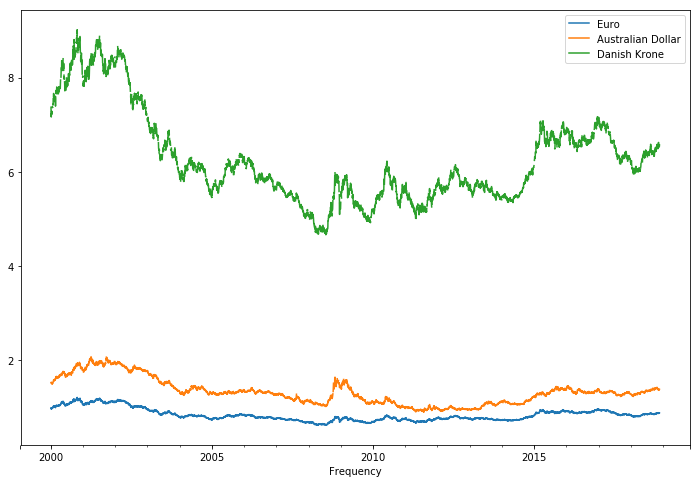

In [8]:
# your code here
df.plot(figsize=(12,8))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [10]:
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates for Euro and the Australian dollar are highly correlated, 
but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. 
If you do further research you'll notice that the Danish Krone is pegged to the Euro, 
which means that they are basically designed to perfectly correlate together! 
The fact that the value is just very, very close to 1 is due to rounding errors.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [11]:
# your code here
df_diff = df.diff(periods=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFA84F9F60>,
      dtype=object)

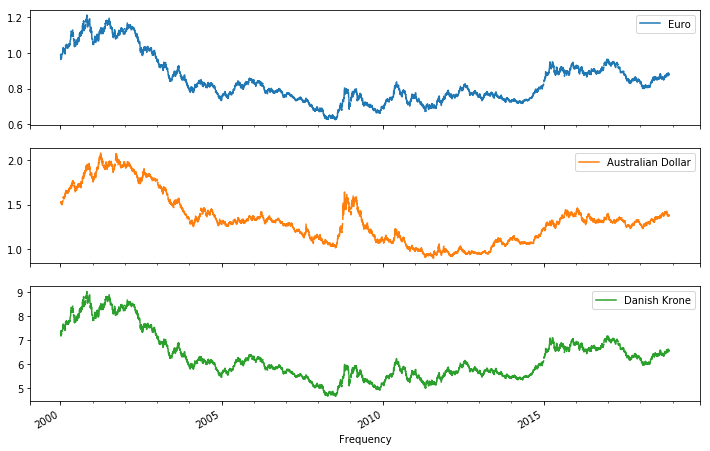

In [13]:
# your code here
df.plot(subplots=True, legend=True, figsize=(12,8))

In [14]:
# your code here
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [15]:
# Differencing the series here led to a decrease 
# in correlation between the EUR/USD and AUD/USD series. 
# If you think a little further, this makes sense: in the lecture before, 
# the high correlation was a result of seasonality. 
# Differencing led to an increase in correlation between series, 
# here the series are moving in the (more or less) same direction 
# on a day-to-day basis and seasonality is not present, hence this result.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [16]:
# your code here
eur = df[['Euro']]
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


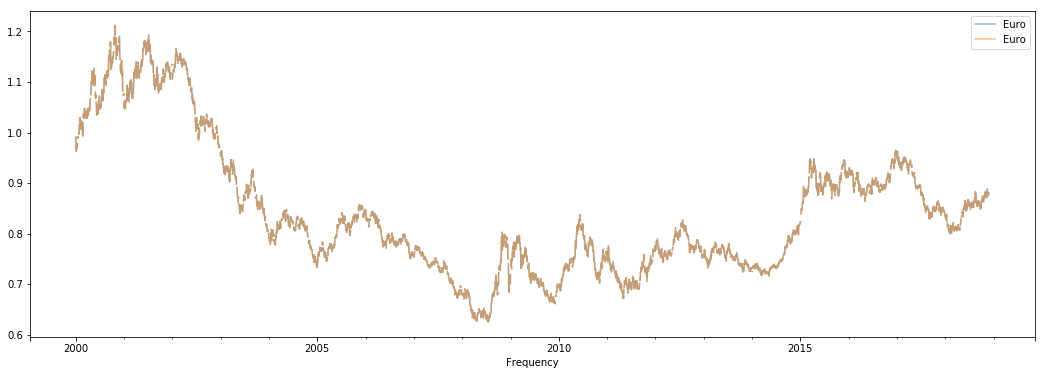

In [17]:
# your code here
lag_1= pd.concat([eur_shift_1, eur], axis=1)
lag_1.plot(figsize=(18,6), alpha=0.5);

In [18]:
# your code here
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

In [22]:
# your code here
eur_shift_1 = eur.shift(periods=50)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


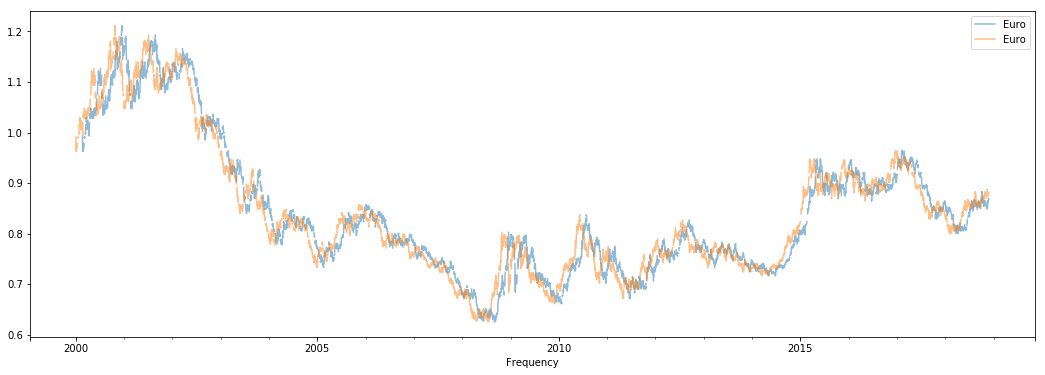

In [23]:
# your code here
lag_1= pd.concat([eur_shift_1, eur], axis=1)
lag_1.plot(figsize=(18,6), alpha=0.5);

In [24]:
# your code here
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [25]:
# Autocorrelation is very high in these time series, even up to a lag as big as 50! 
# This is no big surprise though: remember that these are random walk series, 
# which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

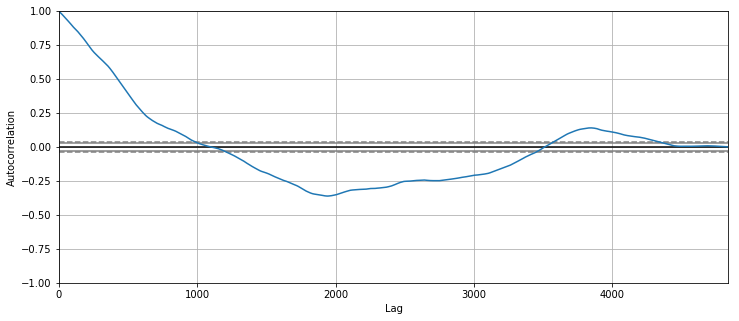

In [27]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

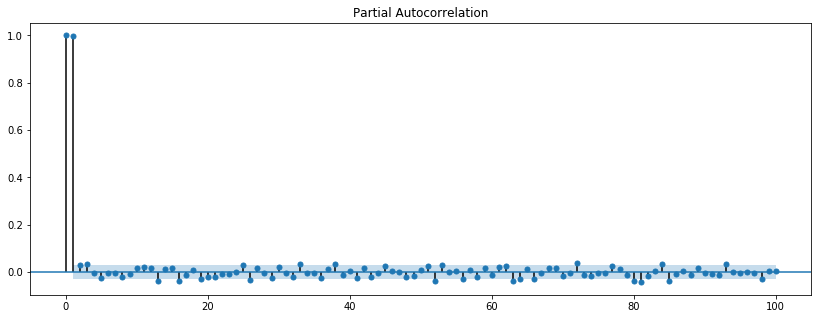

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(eur.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [29]:
# your code here
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [30]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


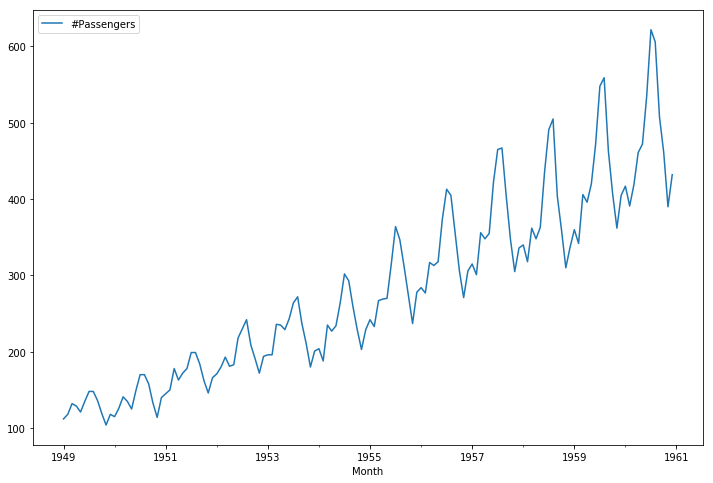

In [31]:
# your code here
df.plot(figsize=(12,8))

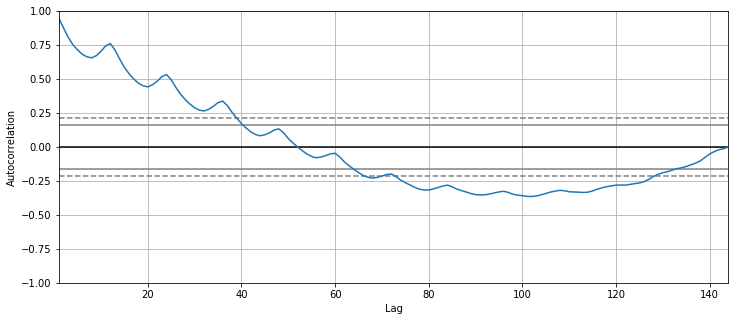

In [32]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df);

In [34]:
# your code here
df_diff = df.diff(periods=1)

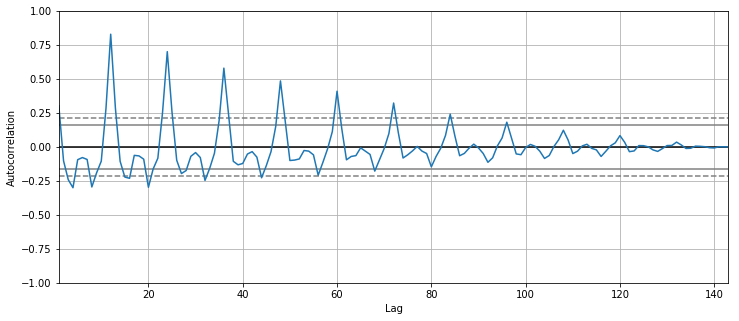

In [45]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff.dropna());

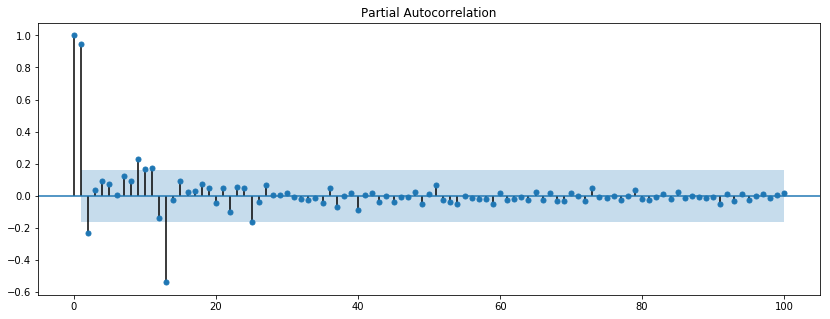

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plot_pacf(df.dropna(), lags = 100, method='ywm');

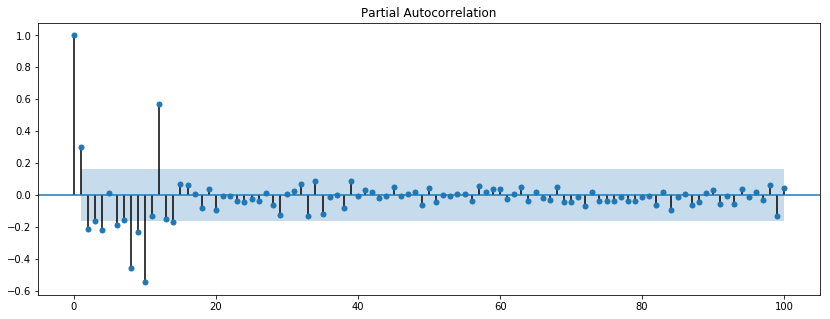

In [38]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df_diff.dropna(), lags = 100, method='ywm');

In [39]:
# your code here
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [41]:
# your code here
df = pd.read_csv('NYSE_monthly.csv')
df.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [42]:
# your code here
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


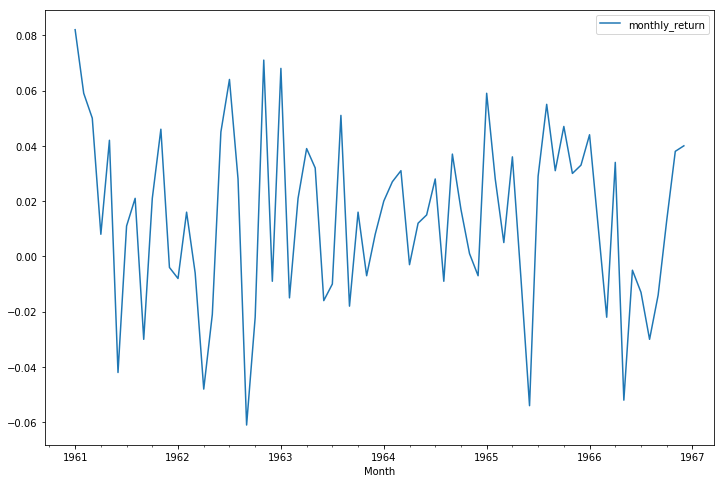

In [43]:
# your code here
df.plot(figsize=(12,8))

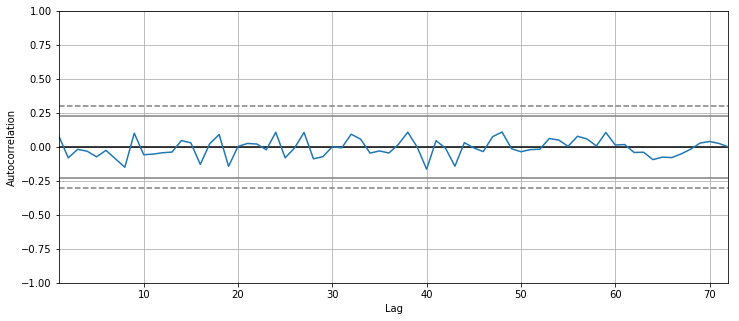

In [48]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df.dropna());

In [49]:
df_diff = df.diff(periods=1)

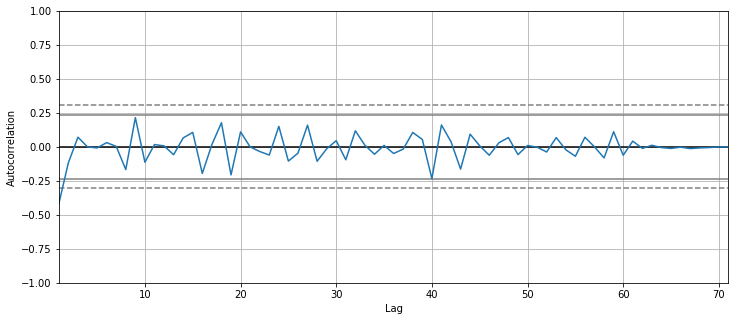

In [50]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff.dropna());

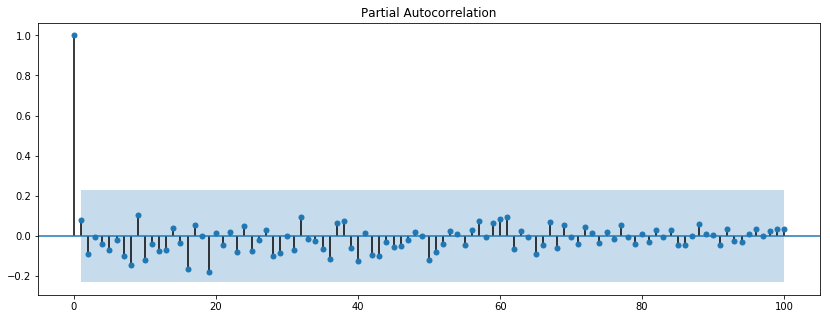

In [51]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(df.dropna(), lags = 100, method='ywm');

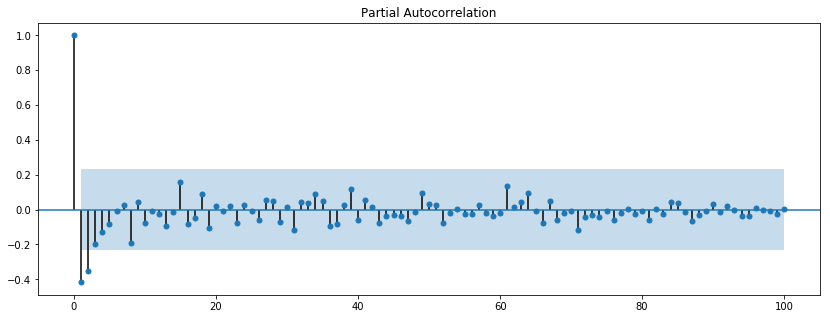

In [52]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(df_diff.dropna(), lags = 100, method='ywm');

In [53]:
# Autocorrelations and partial autocorrelations are virtually 0 for any lag. 
# This is no surprise! The NYSE series was a white noise series, meaning there is no trend or no seasonality! 
# This is, again, a typical result for these kind of series.

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!